In [36]:
import os
import pandas as pd
from pathlib import Path
import mlflow
from mlflow.tracking import MlflowClient

# Initialize MLflow client
mlflow.set_tracking_uri("file:///home/rafael/private/ufrj/CPE727-trabalho-final/mlruns")
client = MlflowClient()

# Experiment ID for final evaluation
experiment_id = "117233694746240421"
experiment_name = "eurosat_dl_comparison_final_evaluation"

print(f"MLflow tracking URI: {mlflow.get_tracking_uri()}")
print(f"Experiment ID: {experiment_id}")
print(f"Experiment Name: {experiment_name}")
print("\nMLflow client initialized successfully!")

MLflow tracking URI: file:///home/rafael/private/ufrj/CPE727-trabalho-final/mlruns
Experiment ID: 117233694746240421
Experiment Name: eurosat_dl_comparison_final_evaluation

MLflow client initialized successfully!


In [37]:
# Get all runs from the evaluation experiment
runs = client.search_runs(
    experiment_ids=[experiment_id],
    order_by=["start_time DESC"]
)

print(f"Found {len(runs)} runs in the experiment\n")

# Collect data from all runs
runs_data = []

for run in runs:
    run_id = run.info.run_id
    run_name = run.info.run_name

    # Get all metrics
    metrics = run.data.metrics

    # Get all parameters
    params = run.data.params

    # Combine everything
    run_data = {
        'run_id': run_id,
        'run_name': run_name,
        'status': run.info.status,
        **params,
        **metrics
    }

    runs_data.append(run_data)

# Create DataFrame
df = pd.DataFrame(runs_data)

# Define expected column order
param_cols = ['batch_size', 'config_run_id', 'dropout', 'freeze_backbone',
              'hidden_layers', 'learning_rate', 'model_name', 'test_samples', 'train_samples']
metric_cols = ['final_train_loss', 'test_accuracy', 'test_f1', 'test_loss',
               'test_precision', 'test_recall', 'train_loss']

# Get actual columns that exist
existing_param_cols = [col for col in param_cols if col in df.columns]
existing_metric_cols = [col for col in metric_cols if col in df.columns]

# Reorder columns
column_order = ['run_id', 'run_name', 'status'] + existing_param_cols + existing_metric_cols
df = df[column_order]

print(f"DataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}\n")
df

Found 4 runs in the experiment

DataFrame shape: (4, 19)
Columns: ['run_id', 'run_name', 'status', 'batch_size', 'config_run_id', 'dropout', 'freeze_backbone', 'hidden_layers', 'learning_rate', 'model_name', 'test_samples', 'train_samples', 'final_train_loss', 'test_accuracy', 'test_f1', 'test_loss', 'test_precision', 'test_recall', 'train_loss']



,run_id,run_name,status,batch_size,config_run_id,dropout,freeze_backbone,hidden_layers,learning_rate,model_name,test_samples,train_samples,final_train_loss,test_accuracy,test_f1,test_loss,test_precision,test_recall,train_loss
0,d8660693b94a4dde9fe4f4bb6ccf2ce5,vit_b_16_final_evaluation,FINISHED,64,63ef075bc53441918e2b2530bf2468f9,NaN,True,NaN,1e-05,vit_b_16,5400,21600,0.239379,0.940556,0.940612,0.227304,0.940931,0.940556,0.269648
1,9e68e994a07d40958fc5b1fcbf6fd34a,vgg16_final_evaluation,FINISHED,64,3f5a64eb64504f52bd6889695c53aa36,0.3,True,NaN,0.0001,vgg16,5400,21600,0.136612,0.943889,0.943732,0.175083,0.944087,0.943889,0.145079
2,344f1a9d456643be8d0957e41bfe0803,resnet50_final_evaluation,FINISHED,64,0ec1f9a0c59a46c1a71f60c9c9d38bdd,NaN,True,NaN,0.0001,resnet50,5400,21600,0.279925,0.913148,0.912767,0.287461,0.913910,0.913148,0.305907
3,0e6c5a16eca54a4cbf5e6339aa3accf5,mlp_final_evaluation,FINISHED,64,b9e6967599c648558771d4441f01b867,0.3,NaN,"[512, 256]",0.001,mlp,5400,21600,1.781351,0.204074,0.149810,1.971269,0.235213,0.204074,1.912167


In [38]:
# Display full table with better formatting
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

print("=" * 150)
print("MLflow Evaluation Experiment - All Runs Summary")
print("=" * 150)
print("\nRun Details:")
print("-" * 150)
df

MLflow Evaluation Experiment - All Runs Summary

Run Details:
------------------------------------------------------------------------------------------------------------------------------------------------------


,run_id,run_name,status,batch_size,config_run_id,dropout,freeze_backbone,hidden_layers,learning_rate,model_name,test_samples,train_samples,final_train_loss,test_accuracy,test_f1,test_loss,test_precision,test_recall,train_loss
0,d8660693b94a4dde9fe4f4bb6ccf2ce5,vit_b_16_final_evaluation,FINISHED,64,63ef075bc53441918e2b2530bf2468f9,NaN,True,NaN,1e-05,vit_b_16,5400,21600,0.239379,0.940556,0.940612,0.227304,0.940931,0.940556,0.269648
1,9e68e994a07d40958fc5b1fcbf6fd34a,vgg16_final_evaluation,FINISHED,64,3f5a64eb64504f52bd6889695c53aa36,0.3,True,NaN,0.0001,vgg16,5400,21600,0.136612,0.943889,0.943732,0.175083,0.944087,0.943889,0.145079
2,344f1a9d456643be8d0957e41bfe0803,resnet50_final_evaluation,FINISHED,64,0ec1f9a0c59a46c1a71f60c9c9d38bdd,NaN,True,NaN,0.0001,resnet50,5400,21600,0.279925,0.913148,0.912767,0.287461,0.913910,0.913148,0.305907
3,0e6c5a16eca54a4cbf5e6339aa3accf5,mlp_final_evaluation,FINISHED,64,b9e6967599c648558771d4441f01b867,0.3,NaN,"[512, 256]",0.001,mlp,5400,21600,1.781351,0.204074,0.149810,1.971269,0.235213,0.204074,1.912167


In [39]:
# Show detailed view of each run separately
print("\n" + "=" * 150)
print("Detailed View by Run")
print("=" * 150)

for idx, row in df.iterrows():
    print(f"\n{'='*80}")
    print(f"Run: {row['run_name']}")
    print(f"Run ID: {row['run_id']}")
    print(f"{'='*80}")

    print("\nParameters:")
    print("-" * 40)
    for col in existing_param_cols:
        if pd.notna(row[col]):
            print(f"  {col:20s}: {row[col]}")

    print("\nMetrics:")
    print("-" * 40)
    for col in existing_metric_cols:
        if pd.notna(row[col]):
            print(f"  {col:20s}: {row[col]:.6f}")
    print()


Detailed View by Run

Run: vit_b_16_final_evaluation
Run ID: d8660693b94a4dde9fe4f4bb6ccf2ce5

Parameters:
----------------------------------------
  batch_size          : 64
  config_run_id       : 63ef075bc53441918e2b2530bf2468f9
  freeze_backbone     : True
  learning_rate       : 1e-05
  model_name          : vit_b_16
  test_samples        : 5400
  train_samples       : 21600

Metrics:
----------------------------------------
  final_train_loss    : 0.239379
  test_accuracy       : 0.940556
  test_f1             : 0.940612
  test_loss           : 0.227304
  test_precision      : 0.940931
  test_recall         : 0.940556
  train_loss          : 0.269648


Run: vgg16_final_evaluation
Run ID: 9e68e994a07d40958fc5b1fcbf6fd34a

Parameters:
----------------------------------------
  batch_size          : 64
  config_run_id       : 3f5a64eb64504f52bd6889695c53aa36
  dropout             : 0.3
  freeze_backbone     : True
  learning_rate       : 0.0001
  model_name          : vgg16
  test_

In [40]:
# Export to CSV
output_file = "../data/08_reporting/evaluation_runs_summary.csv"
df.to_csv(output_file, index=False)
print(f"\nTable exported to: {output_file}")


Table exported to: ../data/08_reporting/evaluation_runs_summary.csv


In [41]:
# Create LaTeX table in IEEE format
# Remove run_id and status columns
df_latex = df.drop(columns=['run_id', 'status'])

# Rename run_name to Model for better presentation
df_latex = df_latex.rename(columns={'run_name': 'Model'})

# Clean up model names (remove _final_evaluation suffix)
df_latex['Model'] = df_latex['Model'].str.replace('_final_evaluation', '')

# Keep only Model and test metrics
test_metric_cols = ['test_accuracy', 'test_f1', 'test_loss', 'test_precision', 'test_recall']
columns_to_keep = ['Model'] + [col for col in test_metric_cols if col in df_latex.columns]
df_latex = df_latex[columns_to_keep]

# Rename columns for better presentation in paper
df_latex = df_latex.rename(columns={
    'test_accuracy': 'Accuracy',
    'test_f1': 'F1-Score',
    'test_loss': 'Loss',
    'test_precision': 'Precision',
    'test_recall': 'Recall'
})

# Format numeric columns to appropriate precision
for col in df_latex.columns:
    if col != 'Model':
        if col == 'Loss':
            df_latex[col] = df_latex[col].apply(lambda x: f'{x:.6f}' if pd.notna(x) else '-')
        else:
            df_latex[col] = df_latex[col].apply(lambda x: f'{x:.4f}' if pd.notna(x) else '-')

# Generate LaTeX table
latex_output = df_latex.to_latex(
    index=False,
    escape=False,
    column_format='l' + 'c' * (len(df_latex.columns) - 1),
    caption='Test performance metrics for different model architectures on EuroSAT dataset.',
    label='tab:test_results'
)

# Post-process to use IEEE-style booktabs
latex_output = latex_output.replace('\\toprule', '\\hline')
latex_output = latex_output.replace('\\midrule', '\\hline')
latex_output = latex_output.replace('\\bottomrule', '\\hline')

print("LaTeX Table Code:")
print("=" * 100)
print(latex_output)
print("=" * 100)
print("\nNote: For IEEE format, include \\usepackage{booktabs} in your LaTeX preamble")

LaTeX Table Code:
\begin{table}
\caption{Test performance metrics for different model architectures on EuroSAT dataset.}
\label{tab:test_results}
\begin{tabular}{lccccc}
\hline
Model & Accuracy & F1-Score & Loss & Precision & Recall \\
\hline
vit_b_16 & 0.9406 & 0.9406 & 0.227304 & 0.9409 & 0.9406 \\
vgg16 & 0.9439 & 0.9437 & 0.175083 & 0.9441 & 0.9439 \\
resnet50 & 0.9131 & 0.9128 & 0.287461 & 0.9139 & 0.9131 \\
mlp & 0.2041 & 0.1498 & 1.971269 & 0.2352 & 0.2041 \\
\hline
\end{tabular}
\end{table}


Note: For IEEE format, include \usepackage{booktabs} in your LaTeX preamble


Confusion Matrix and Classification Report for Selected Runs

Run 0: vit_b_16_final_evaluation
Run ID: d8660693b94a4dde9fe4f4bb6ccf2ce5

--- Confusion Matrix ---

File: vit_b_16_confusion_matrix.npy
Shape: (10, 10)


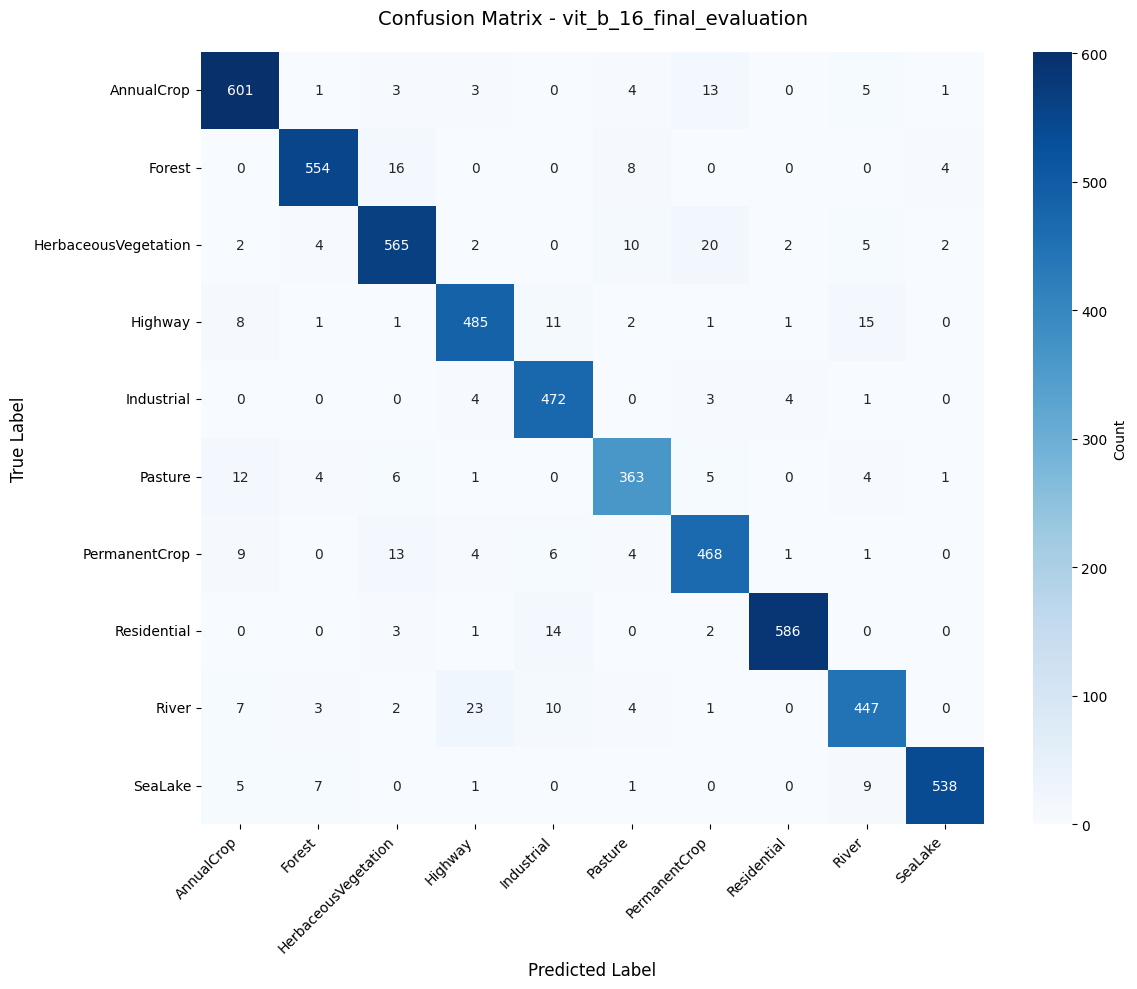


Per-class accuracy:
  AnnualCrop               :  95.25% (601/631)
  Forest                   :  95.19% (554/582)
  HerbaceousVegetation     :  92.32% (565/612)
  Highway                  :  92.38% (485/525)
  Industrial               :  97.52% (472/484)
  Pasture                  :  91.67% (363/396)
  PermanentCrop            :  92.49% (468/506)
  Residential              :  96.70% (586/606)
  River                    :  89.94% (447/497)
  SeaLake                  :  95.90% (538/561)

--- Classification Report ---

File: vit_b_16_classification_report.json

                           precision     recall   f1-score    support

                        0       0.93       0.95       0.94        631
                        1       0.97       0.95       0.96        582
                        2       0.93       0.92       0.93        612
                        3       0.93       0.92       0.92        525
                        4       0.92       0.98       0.95        484
             

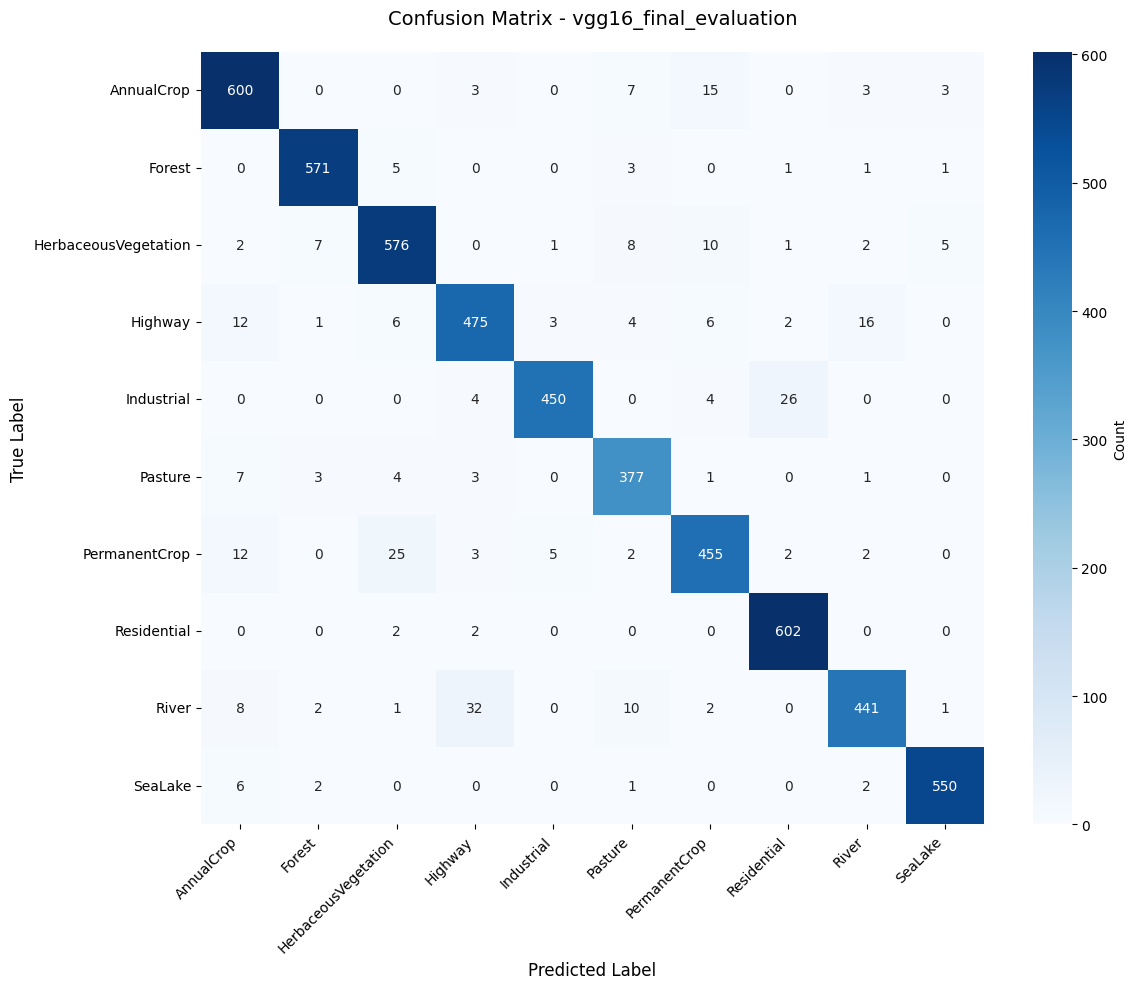


Per-class accuracy:
  AnnualCrop               :  95.09% (600/631)
  Forest                   :  98.11% (571/582)
  HerbaceousVegetation     :  94.12% (576/612)
  Highway                  :  90.48% (475/525)
  Industrial               :  92.98% (450/484)
  Pasture                  :  95.20% (377/396)
  PermanentCrop            :  89.92% (455/506)
  Residential              :  99.34% (602/606)
  River                    :  88.73% (441/497)
  SeaLake                  :  98.04% (550/561)

--- Classification Report ---

File: vgg16_classification_report.json

                           precision     recall   f1-score    support

                        0       0.93       0.95       0.94        631
                        1       0.97       0.98       0.98        582
                        2       0.93       0.94       0.94        612
                        3       0.91       0.90       0.91        525
                        4       0.98       0.93       0.95        484
                

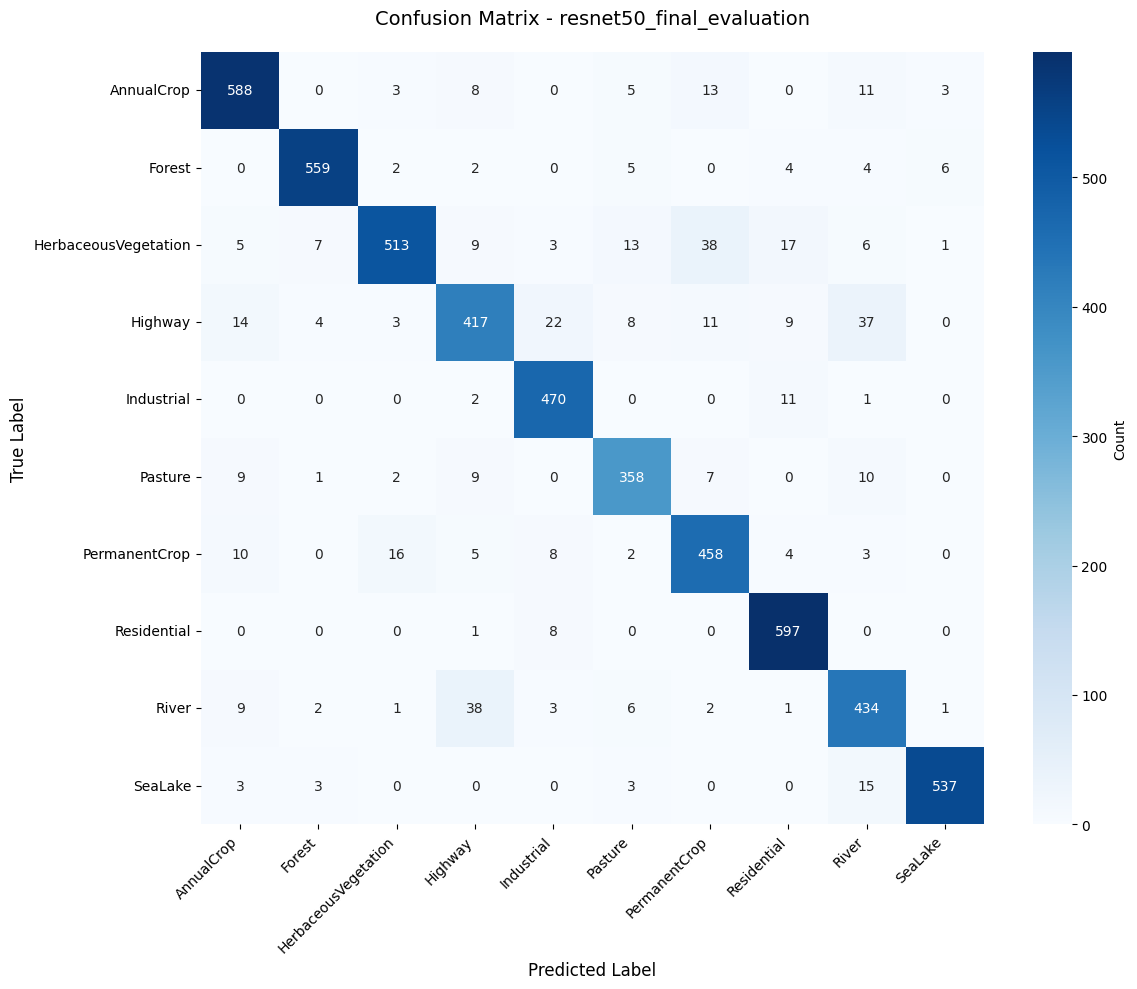


Per-class accuracy:
  AnnualCrop               :  93.19% (588/631)
  Forest                   :  96.05% (559/582)
  HerbaceousVegetation     :  83.82% (513/612)
  Highway                  :  79.43% (417/525)
  Industrial               :  97.11% (470/484)
  Pasture                  :  90.40% (358/396)
  PermanentCrop            :  90.51% (458/506)
  Residential              :  98.51% (597/606)
  River                    :  87.32% (434/497)
  SeaLake                  :  95.72% (537/561)

--- Classification Report ---

File: resnet50_classification_report.json

                           precision     recall   f1-score    support

                        0       0.92       0.93       0.93        631
                        1       0.97       0.96       0.97        582
                        2       0.95       0.84       0.89        612
                        3       0.85       0.79       0.82        525
                        4       0.91       0.97       0.94        484
             

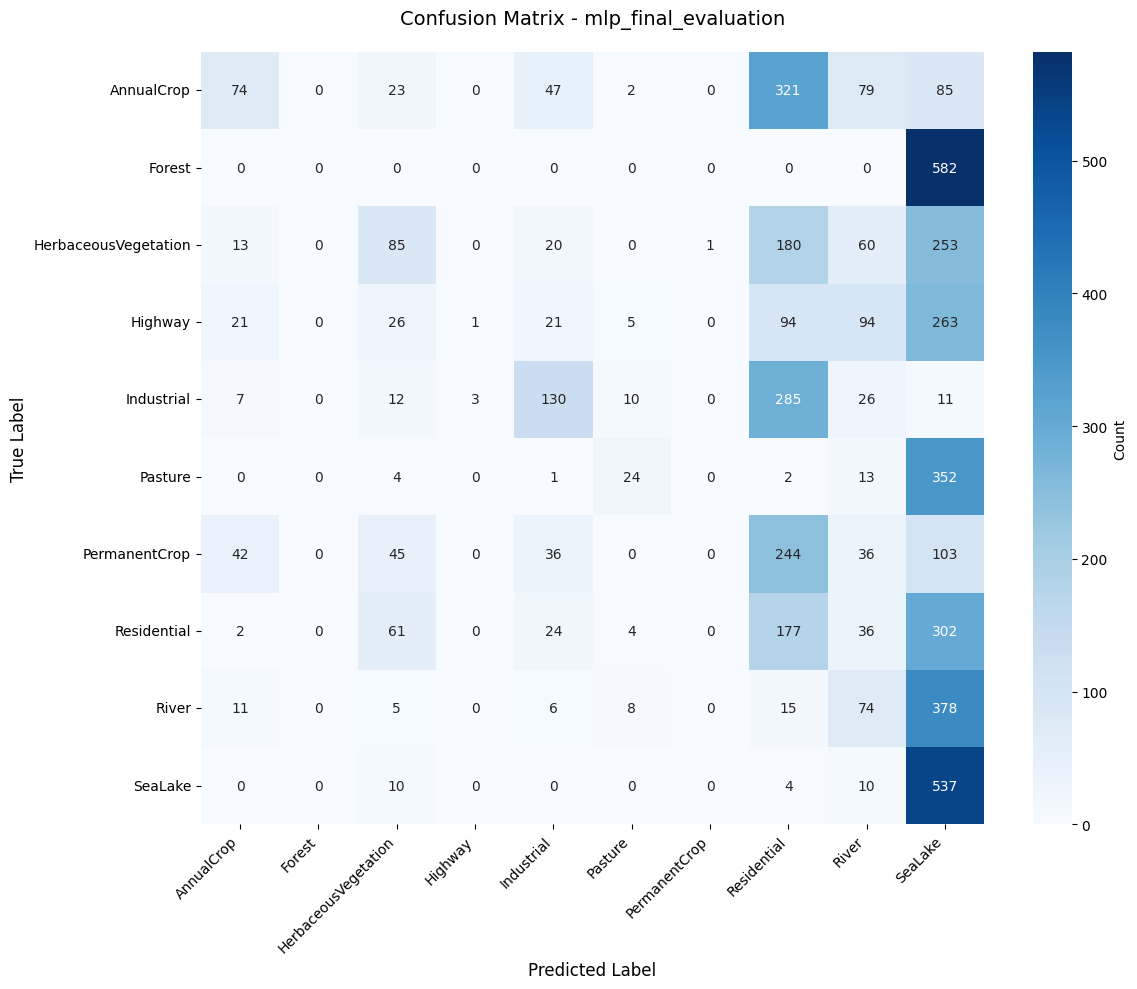


Per-class accuracy:
  AnnualCrop               :  11.73% (74/631)
  Forest                   :   0.00% (0/582)
  HerbaceousVegetation     :  13.89% (85/612)
  Highway                  :   0.19% (1/525)
  Industrial               :  26.86% (130/484)
  Pasture                  :   6.06% (24/396)
  PermanentCrop            :   0.00% (0/506)
  Residential              :  29.21% (177/606)
  River                    :  14.89% (74/497)
  SeaLake                  :  95.72% (537/561)

--- Classification Report ---

File: mlp_classification_report.json

                           precision     recall   f1-score    support

                        0       0.44       0.12       0.18        631
                        1       0.00       0.00       0.00        582
                        2       0.31       0.14       0.19        612
                        3       0.25       0.00       0.00        525
                        4       0.46       0.27       0.34        484
                        5   

In [44]:
import numpy as np
from PIL import Image
import json
import matplotlib.pyplot as plt
import seaborn as sns

# Class names for EuroSAT dataset
class_names = ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway',
               'Industrial', 'Pasture', 'PermanentCrop', 'Residential',
               'River', 'SeaLake']

# Runs to check (indices 0, 1, 2 for first 3 runs)
run_indices = [0, 1, 2, 3]

print("=" * 150)
print("Confusion Matrix and Classification Report for Selected Runs")
print("=" * 150)

for idx in run_indices:
    if idx >= len(df):
        print(f"\nSkipping index {idx} - out of range")
        continue

    run_row = df.iloc[idx]
    run_id = run_row['run_id']
    run_name = run_row['run_name']

    print(f"\n{'='*100}")
    print(f"Run {idx}: {run_name}")
    print(f"Run ID: {run_id}")
    print(f"{'='*100}")

    # Path to artifacts directory using MLflow structure
    experiment_path = Path("../mlruns") / experiment_id
    artifacts_path = experiment_path / run_id / "artifacts"

    if artifacts_path.exists():
        # Look for confusion matrix (common names: confusion_matrix.png, confusion_matrix.npy, etc.)
        confusion_matrix_files = list(artifacts_path.glob("reports/*confusion*"))
        classification_report_files = list(artifacts_path.glob("reports/*classification*"))

        # Display confusion matrix
        if confusion_matrix_files:
            print("\n--- Confusion Matrix ---")
            for cm_file in confusion_matrix_files:
                print(f"\nFile: {cm_file.name}")
                if cm_file.suffix == '.png':
                    img = Image.open(cm_file)
                    plt.figure(figsize=(10, 8))
                    plt.imshow(img)
                    plt.axis('off')
                    plt.title(f"Confusion Matrix - {run_name}", fontsize=14)
                    plt.tight_layout()
                    plt.show()
                elif cm_file.suffix == '.npy':
                    cm = np.load(cm_file)
                    print(f"Shape: {cm.shape}")

                    # Plot the confusion matrix
                    plt.figure(figsize=(12, 10))
                    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                                xticklabels=class_names,
                                yticklabels=class_names,
                                cbar_kws={'label': 'Count'})
                    plt.title(f'Confusion Matrix - {run_name}', fontsize=14, pad=20)
                    plt.ylabel('True Label', fontsize=12)
                    plt.xlabel('Predicted Label', fontsize=12)
                    plt.xticks(rotation=45, ha='right')
                    plt.yticks(rotation=0)
                    plt.tight_layout()
                    plt.show()

                    # Also print accuracy per class
                    print("\nPer-class accuracy:")
                    for i, class_name in enumerate(class_names):
                        if cm[i].sum() > 0:
                            accuracy = cm[i, i] / cm[i].sum() * 100
                            print(f"  {class_name:25s}: {accuracy:6.2f}% ({cm[i, i]}/{int(cm[i].sum())})")
        else:
            print("\nNo confusion matrix found in artifacts")

        # Display classification report
        if classification_report_files:
            print("\n--- Classification Report ---")
            for cr_file in classification_report_files:
                print(f"\nFile: {cr_file.name}")
                if cr_file.suffix == '.txt':
                    with open(cr_file, 'r') as f:
                        print(f.read())
                elif cr_file.suffix == '.json':
                    with open(cr_file, 'r') as f:
                        report = json.load(f)

                    # Format as sklearn-style table
                    print()
                    # Header
                    print(f"{'':>25s}  {'precision':>9s}  {'recall':>9s}  {'f1-score':>9s}  {'support':>9s}")
                    print()

                    # Per-class metrics
                    for class_name, metrics in report.items():
                        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
                            if isinstance(metrics, dict):
                                precision = metrics.get('precision', 0)
                                recall = metrics.get('recall', 0)
                                f1 = metrics.get('f1-score', 0)
                                support = metrics.get('support', 0)
                                print(f"{class_name:>25s}  {precision:9.2f}  {recall:9.2f}  {f1:9.2f}  {support:9.0f}")

                    print()

                    # Overall metrics
                    if 'accuracy' in report:
                        acc = report['accuracy']
                        total_support = sum(m.get('support', 0) for k, m in report.items()
                                          if isinstance(m, dict) and k not in ['macro avg', 'weighted avg'])
                        print(f"{'accuracy':>25s}  {'':<9s}  {'':<9s}  {acc:9.2f}  {total_support:9.0f}")

                    for avg_type in ['macro avg', 'weighted avg']:
                        if avg_type in report and isinstance(report[avg_type], dict):
                            metrics = report[avg_type]
                            precision = metrics.get('precision', 0)
                            recall = metrics.get('recall', 0)
                            f1 = metrics.get('f1-score', 0)
                            support = metrics.get('support', 0)
                            print(f"{avg_type:>25s}  {precision:9.2f}  {recall:9.2f}  {f1:9.2f}  {support:9.0f}")

        else:
            print("\nNo classification report found in artifacts")

        # List all artifacts for reference
        print("\n--- All artifacts in this run ---")
        all_artifacts = list(artifacts_path.rglob("*"))
        for artifact in all_artifacts:
            if artifact.is_file():
                print(f"  - {artifact.relative_to(artifacts_path)}")
    else:
        print(f"\nArtifacts directory not found: {artifacts_path}")

    print()

In [43]:
report['accuracy']

0.20407407407407407

In [35]:
# Generate LaTeX tables for classification reports
print("=" * 150)
print("LaTeX Tables - Classification Reports")
print("=" * 150)

for idx in run_indices:
    if idx >= len(df):
        continue

    run_row = df.iloc[idx]
    run_id = run_row['run_id']
    run_name = run_row['run_name']

    # Clean model name
    model_name = run_name.replace('_final_evaluation', '')

    # Path to artifacts
    experiment_path = Path("../mlruns") / experiment_id
    artifacts_path = experiment_path / run_id / "artifacts"

    if not artifacts_path.exists():
        continue

    # Find classification report JSON
    classification_report_files = list(artifacts_path.glob("reports/*classification*.json"))

    if not classification_report_files:
        continue

    # Load the classification report
    cr_file = classification_report_files[0]
    with open(cr_file, 'r') as f:
        report = json.load(f)

    # Create DataFrame for per-class metrics
    rows = []
    for class_name, metrics in report.items():
        if class_name not in ['accuracy', 'macro avg', 'weighted avg']:
            if isinstance(metrics, dict):
                rows.append({
                    'Class': class_name,
                    'Precision': metrics.get('precision', 0),
                    'Recall': metrics.get('recall', 0),
                    'F1-Score': metrics.get('f1-score', 0),
                    'Support': int(metrics.get('support', 0))
                })

    # Add average rows
    for avg_type in ['macro avg', 'weighted avg']:
        if avg_type in report and isinstance(report[avg_type], dict):
            metrics = report[avg_type]
            rows.append({
                'Class': avg_type.title(),
                'Precision': metrics.get('precision', 0),
                'Recall': metrics.get('recall', 0),
                'F1-Score': metrics.get('f1-score', 0),
                'Support': int(metrics.get('support', 0))
            })

    df_report = pd.DataFrame(rows)

    # Format numeric columns
    df_report['Precision'] = df_report['Precision'].apply(lambda x: f'{x:.4f}')
    df_report['Recall'] = df_report['Recall'].apply(lambda x: f'{x:.4f}')
    df_report['F1-Score'] = df_report['F1-Score'].apply(lambda x: f'{x:.4f}')

    # Generate LaTeX table
    latex_table = df_report.to_latex(
        index=False,
        escape=False,
        column_format='l' + 'c' * (len(df_report.columns) - 1),
        caption=f'Classification report for {model_name} on EuroSAT test set.',
        label=f'tab:classification_{model_name.lower()}'
    )

    # Post-process for IEEE-style
    latex_table = latex_table.replace('\\toprule', '\\hline')
    latex_table = latex_table.replace('\\midrule', '\\hline')
    latex_table = latex_table.replace('\\bottomrule', '\\hline')

    # Print the table
    print(f"\n{'='*100}")
    print(f"Model: {model_name}")
    print(f"Overall Accuracy: {report.get('accuracy', 0):.4f}")
    print(f"{'='*100}")
    print(latex_table)
    print()

print("\nNote: Include \\usepackage{booktabs} in your LaTeX preamble for proper formatting")

LaTeX Tables - Classification Reports

Model: vgg16
Overall Accuracy: 0.9439
\begin{table}
\caption{Classification report for vgg16 on EuroSAT test set.}
\label{tab:classification_vgg16}
\begin{tabular}{lcccc}
\hline
Class & Precision & Recall & F1-Score & Support \\
\hline
0 & 0.9274 & 0.9509 & 0.9390 & 631 \\
1 & 0.9744 & 0.9811 & 0.9777 & 582 \\
2 & 0.9305 & 0.9412 & 0.9358 & 612 \\
3 & 0.9100 & 0.9048 & 0.9074 & 525 \\
4 & 0.9804 & 0.9298 & 0.9544 & 484 \\
5 & 0.9150 & 0.9520 & 0.9332 & 396 \\
6 & 0.9229 & 0.8992 & 0.9109 & 506 \\
7 & 0.9495 & 0.9934 & 0.9710 & 606 \\
8 & 0.9423 & 0.8873 & 0.9140 & 497 \\
9 & 0.9821 & 0.9804 & 0.9813 & 561 \\
Macro Avg & 0.9435 & 0.9420 & 0.9425 & 5400 \\
Weighted Avg & 0.9441 & 0.9439 & 0.9437 & 5400 \\
\hline
\end{tabular}
\end{table}



Model: resnet50
Overall Accuracy: 0.9131
\begin{table}
\caption{Classification report for resnet50 on EuroSAT test set.}
\label{tab:classification_resnet50}
\begin{tabular}{lcccc}
\hline
Class & Precision & Recal